# 1 - TEXT CLASSIFICATION

## Import packages and modules

In [112]:
import pandas as pd
import spacy
import string
import nltk
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier

import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint

from gensim.models import Word2Vec
import gensim.downloader
import numpy as np
from scipy import spatial

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

## Dataset uploading

In [66]:
dataset = pd.read_csv('https://raw.githubusercontent.com/ProfAI/natural-language-processing/main/datasets/Verifica%20Finale%20-%20Spam%20Detection/spam_dataset.csv')
dataset

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [67]:
dataset["label"].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

## Training and testing dataset creation

In [68]:
X_train,X_test,y_train,y_test=train_test_split(dataset["text"],dataset["label"],test_size=0.3,random_state=42)

In [69]:
X_train

1023    Subject: re : tenaska\ni see the demand fee ch...
4586    Subject: strong buy alert : monthly newsletter...
2955    Subject: performance feedback\neach of you hav...
2495    Subject: hr performance objectives binders\ngo...
3353    Subject: fw : [ fwd : fw : drawing by a school...
                              ...                        
4426    Subject: re : ena sales on hpl\nlast that i ha...
466     Subject: tenaska iv\nbob :\ni understand from ...
3092    Subject: broom , bristles up , flew\nbe differ...
3772    Subject: calpine daily gas nomination ( weeken...
860     Subject: re : meter 1459 , 6 / 00\nyep , you '...
Name: text, Length: 3619, dtype: object

In [70]:
y_train

1023     ham
4586    spam
2955     ham
2495     ham
3353     ham
        ... 
4426     ham
466      ham
3092    spam
3772     ham
860      ham
Name: label, Length: 3619, dtype: object

In [71]:
X_test

1566    Subject: hpl nom for march 30 , 2001\n( see at...
1988    Subject: online pharxmacy 80 % off all meds\nd...
1235    Subject: re : nom / actual volume for april 17...
2868    Subject: re : meter 8740 dec 99\nrobert and i ...
4903    Subject: re : coastal oil & gas corporation\nm...
                              ...                        
5135    Subject: revision # 1 - enron / hpl actuals fo...
2298    Subject: re : discrepancies in price of gas re...
1519    Subject: well head\nhere is the list of meter ...
1740    Subject: jordyn , there is nothing like a drea...
1700    Subject: union gas - thamm # 1\ntom ,\nthe tha...
Name: text, Length: 1552, dtype: object

In [72]:
y_test

1566     ham
1988    spam
1235     ham
2868     ham
4903     ham
        ... 
5135     ham
2298     ham
1519     ham
1740    spam
1700     ham
Name: label, Length: 1552, dtype: object

## Data cleaning & BOW

In [73]:
nltk.download("stopwords")
#take into account the english stopwords
english_stopwords=stopwords.words("english")
#load en_core_web_sm module from spacy library in nlp variable
nlp=spacy.load("en_core_web_sm")
punctuation=set(string.punctuation)

#define a data cleaner function
def data_cleaner(dataset):
    dataset_to_return=[]
    for sentence in dataset:
        #transform sentence in lower case and replace punctuation with space
        sentence=sentence.lower()
        for c in string.punctuation:
            sentence=sentence.replace(c," ")

        #trasform sentence in lemmatized tokens using nlp variable previously inizialized 
        document=nlp(sentence)
        sentence=" ".join(token.lemma_ for token in document)

        #remove english stopwords, removing numbers and redundant spaces
        sentence=" ".join(word for word in sentence.split() if word not in english_stopwords)
        sentence=re.sub("\d","", sentence)
        sentence=re.sub(" +"," ", sentence)
        dataset_to_return.append(sentence)

    return dataset_to_return

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
def bow_tfidf(dataset,tfidf_vectorizer):
    if tfidf_vectorizer==None:
        tfidf_vectorizer=TfidfVectorizer()
        X=tfidf_vectorizer.fit_transform(dataset)
    else:
        X=tfidf_vectorizer.transform(dataset)
    return X.toarray(), tfidf_vectorizer

In [75]:
X_train,vectorizer=bow_tfidf(data_cleaner(X_train),None)
X_test,vectorizer=bow_tfidf(data_cleaner(X_test),vectorizer)

## Multi Layer Perceptron Classifier Fit

In [76]:
clf=MLPClassifier(activation="logistic",
                 solver="adam",
                 max_iter=100,
                 hidden_layer_sizes=(100,),
                 tol=0.005,
                verbose=True
                 )

In [77]:
clf.fit(X_train,y_train)

Iteration 1, loss = 0.60122948
Iteration 2, loss = 0.56352495
Iteration 3, loss = 0.52930088
Iteration 4, loss = 0.49242734
Iteration 5, loss = 0.45083895
Iteration 6, loss = 0.40465529
Iteration 7, loss = 0.35573138
Iteration 8, loss = 0.30842390
Iteration 9, loss = 0.26421188
Iteration 10, loss = 0.22513426
Iteration 11, loss = 0.19195496
Iteration 12, loss = 0.16479065
Iteration 13, loss = 0.14205274
Iteration 14, loss = 0.12359776
Iteration 15, loss = 0.10844109
Iteration 16, loss = 0.09587801
Iteration 17, loss = 0.08547956
Iteration 18, loss = 0.07664318
Iteration 19, loss = 0.06916970
Iteration 20, loss = 0.06289289
Iteration 21, loss = 0.05744146
Iteration 22, loss = 0.05283215
Iteration 23, loss = 0.04870111
Iteration 24, loss = 0.04513000
Iteration 25, loss = 0.04204804
Iteration 26, loss = 0.03926723
Iteration 27, loss = 0.03683465
Iteration 28, loss = 0.03458941
Iteration 29, loss = 0.03265183
Iteration 30, loss = 0.03091900
Iteration 31, loss = 0.02931086
Iteration 32, los

MLPClassifier(activation='logistic', max_iter=100, tol=0.005, verbose=True)

## Multi Layer Perceptron Classifier Evaluation

In [78]:
clf.score(X_test,y_test)

0.9864690721649485

In [105]:
def plot_confusion_matrix(y_true,y_pred, labels=["Negative Response","Positive Response"],show_precision_recall=False):
    cm=confusion_matrix(y_true,y_pred)
    df_cm=pd.DataFrame(cm, 
                       index=labels,
                       columns=["Predicted " + labels[0],"Predicted " + labels[1]]
                      )
    plt.figure(figsize=(10, 8), dpi=80)
    hm=sns.heatmap(df_cm, annot=True,fmt="g")
    
    if show_precision_recall:
        plt.text(0,-0.1,f"Precision: {cm[1][1]/(cm[1][1]+cm[0][1]):.4f}")
        plt.text(1,-0.1,f"Recall: {cm[1][1]/(cm[1][1]+cm[1][0]):.4f}")
    plt.show()

In [101]:
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)

TRAIN SET


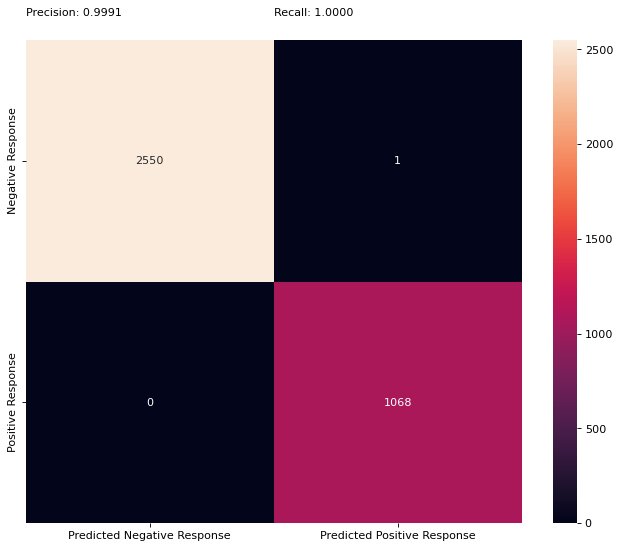

TEST SET


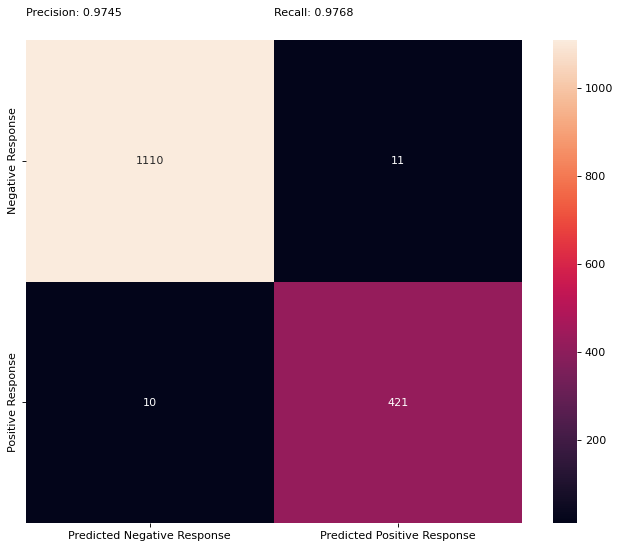

In [106]:
print("TRAIN SET")
plot_confusion_matrix(y_train,y_pred_train,show_precision_recall=True)
print("TEST SET")
plot_confusion_matrix(y_test,y_pred_test,show_precision_recall=True)

In [107]:
print("TRAIN SET")
print(classification_report(y_train,y_pred_train,digits=4))
print("TEST SET")
print(classification_report(y_test,y_pred_test,digits=4))

TRAIN SET
              precision    recall  f1-score   support

         ham     1.0000    0.9996    0.9998      2551
        spam     0.9991    1.0000    0.9995      1068

    accuracy                         0.9997      3619
   macro avg     0.9995    0.9998    0.9997      3619
weighted avg     0.9997    0.9997    0.9997      3619

TEST SET
              precision    recall  f1-score   support

         ham     0.9911    0.9902    0.9906      1121
        spam     0.9745    0.9768    0.9757       431

    accuracy                         0.9865      1552
   macro avg     0.9828    0.9835    0.9831      1552
weighted avg     0.9865    0.9865    0.9865      1552



C:\Users\danil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\danil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


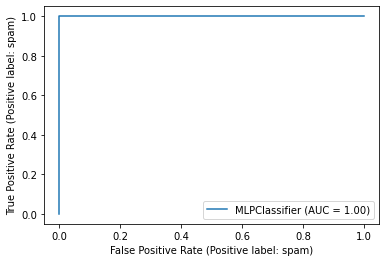

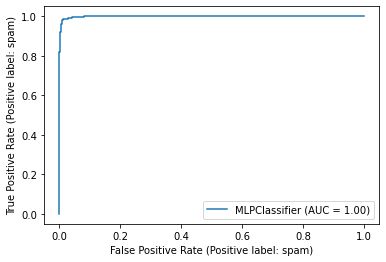

In [110]:
plot_roc_curve(clf,X_train,y_train)
plot_roc_curve(clf,X_test,y_test)

In [79]:
document=[
    ["Important comunication from your bank: you account is being hacked. Insert you credentials."],
    ["We received your job application for Data Scientist. If your profile corresponds to our requirements, a member of our Recruiting team will contact you."],
    ["Your subscription to your Adobe packages is temporarily suspendend. Download this update if you want to continue using Photoshop and other professional software of Adobe suite."],
    ["Dear customer, Bank of America is closing your bank account. Please confirm your PIN at ibankofamerica.com/XJK23L54 to keep your account activated."],
    ["You've won a prize! Claim you €500 Amazon gift card, reply to this e-mail writing your Amazon card code."],
    ["LinkedIn Learning: see a list of courses that are popular with other job seekers. Obtain a certification to boost your career and candidate to your desired position."],
    ["Wanna invest in stock options? Obtain a +20% annual profit, our company offers ad-hoc investment plans and a personal broker at a competitive price. Click below for more information. "],
    ["Your pills' prescription is ready. Download the recipe and order in one click from the link below... "]
]

In [80]:
for sentence in document:
    predicted_target=clf.predict(bow_tfidf(data_cleaner(sentence),vectorizer)[0])
    print(f"SENTENCE: {sentence[0]} \n CLASSIFIED AS: {predicted_target[0]}")
    print("------------------------------------------------------------------------------------")

SENTENCE: Important comunication from your bank: you account is being hacked. Insert you credentials. 
 CLASSIFIED AS: spam
------------------------------------------------------------------------------------
SENTENCE: We received your job application for Data Scientist. If your profile corresponds to our requirements, a member of our Recruiting team will contact you. 
 CLASSIFIED AS: ham
------------------------------------------------------------------------------------
SENTENCE: Your subscription to your Adobe packages is temporarily suspendend. Download this update if you want to continue using Photoshop and other professional software of Adobe suite. 
 CLASSIFIED AS: spam
------------------------------------------------------------------------------------
SENTENCE: Dear customer, Bank of America is closing your bank account. Please confirm your PIN at ibankofamerica.com/XJK23L54 to keep your account activated. 
 CLASSIFIED AS: spam
-------------------------------------------------

## Logistic Regression Classifier Fit

In [113]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

## Logistic Regression Classifier Evaluation

TRAIN SET


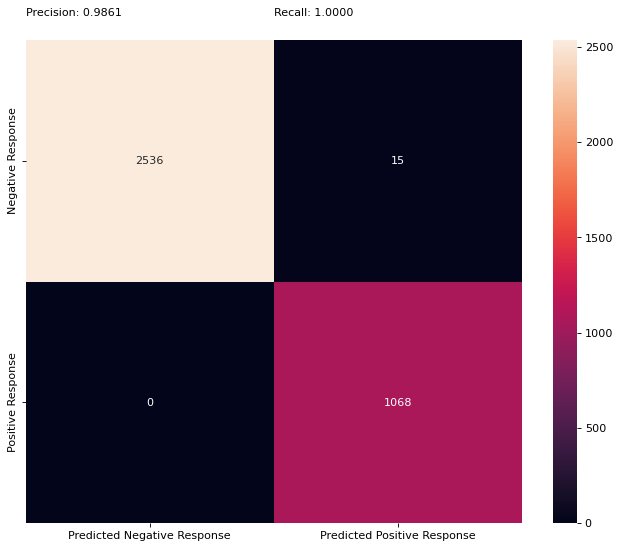

TEST SET


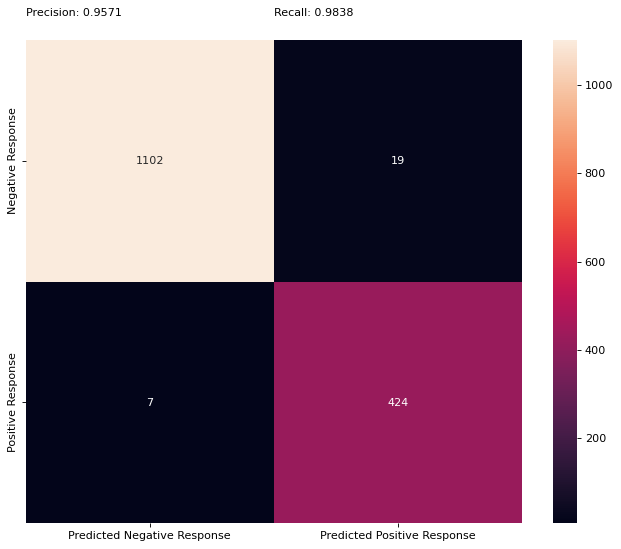

In [114]:
print("TRAIN SET")
plot_confusion_matrix(y_train,y_pred_train,show_precision_recall=True)
print("TEST SET")
plot_confusion_matrix(y_test,y_pred_test,show_precision_recall=True)

In [115]:
print("TRAIN SET")
print(classification_report(y_train,y_pred_train,digits=4))
print("TEST SET")
print(classification_report(y_test,y_pred_test,digits=4))

TRAIN SET
              precision    recall  f1-score   support

         ham     1.0000    0.9941    0.9971      2551
        spam     0.9861    1.0000    0.9930      1068

    accuracy                         0.9959      3619
   macro avg     0.9931    0.9971    0.9950      3619
weighted avg     0.9959    0.9959    0.9959      3619

TEST SET
              precision    recall  f1-score   support

         ham     0.9937    0.9831    0.9883      1121
        spam     0.9571    0.9838    0.9703       431

    accuracy                         0.9832      1552
   macro avg     0.9754    0.9834    0.9793      1552
weighted avg     0.9835    0.9832    0.9833      1552



C:\Users\danil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\danil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


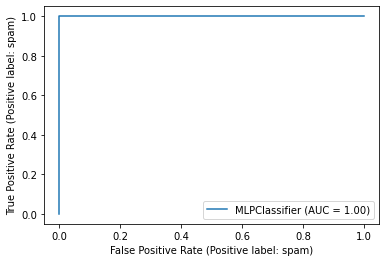

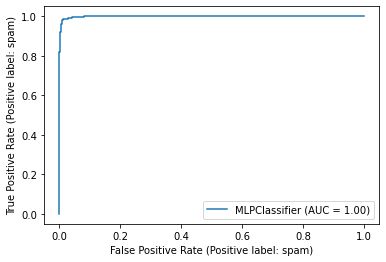

In [116]:
plot_roc_curve(clf,X_train,y_train)
plot_roc_curve(clf,X_test,y_test)

In [117]:
document=[
    ["Important comunication from your bank: you account is being hacked. Insert you credentials."],
    ["We received your job application for Data Scientist. If your profile corresponds to our requirements, a member of our Recruiting team will contact you."],
    ["Your subscription to your Adobe packages is temporarily suspendend. Download this update if you want to continue using Photoshop and other professional software of Adobe suite."],
    ["Dear customer, Bank of America is closing your bank account. Please confirm your PIN at ibankofamerica.com/XJK23L54 to keep your account activated."],
    ["You've won a prize! Claim you €500 Amazon gift card, reply to this e-mail writing your Amazon card code."],
    ["LinkedIn Learning: see a list of courses that are popular with other job seekers. Obtain a certification to boost your career and candidate to your desired position."],
    ["Wanna invest in stock options? Obtain a +20% annual profit, our company offers ad-hoc investment plans and a personal broker at a competitive price. Click below for more information. "],
    ["Your pills' prescription is ready. Download the recipe and order in one click from the link below... "]
]

In [118]:
for sentence in document:
    predicted_target=lr.predict(bow_tfidf(data_cleaner(sentence),vectorizer)[0])
    print(f"SENTENCE: {sentence[0]} \n CLASSIFIED AS: {predicted_target[0]}")
    print("------------------------------------------------------------------------------------")

SENTENCE: Important comunication from your bank: you account is being hacked. Insert you credentials. 
 CLASSIFIED AS: spam
------------------------------------------------------------------------------------
SENTENCE: We received your job application for Data Scientist. If your profile corresponds to our requirements, a member of our Recruiting team will contact you. 
 CLASSIFIED AS: ham
------------------------------------------------------------------------------------
SENTENCE: Your subscription to your Adobe packages is temporarily suspendend. Download this update if you want to continue using Photoshop and other professional software of Adobe suite. 
 CLASSIFIED AS: spam
------------------------------------------------------------------------------------
SENTENCE: Dear customer, Bank of America is closing your bank account. Please confirm your PIN at ibankofamerica.com/XJK23L54 to keep your account activated. 
 CLASSIFIED AS: spam
-------------------------------------------------

## Multi Layer Perceptron VS. Logistic Regression 

The classifiers seem to have similar metrics. In terms of scores on the test set, precision of the LR classifier is lower than the MLP one: a higher number of mails are predicted as SPAM, while acturally are HAM. For this reason, the 6th sentence is correctly classified by the MLP classifier as HAM, while it is wrongly classified as SPAM by the LR one.

# 2 - TOPIC MODELLING

## Dataset SPAM extraction

In [81]:
dataset_spam=dataset[dataset["label"]=="spam"]
documents_spam=dataset_spam["text"]
documents_spam

3       Subject: photoshop , windows , office . cheap ...
7       Subject: looking for medication ? we ` re the ...
10      Subject: vocable % rnd - word asceticism\nvcsc...
11      Subject: report 01405 !\nwffur attion brom est...
13      Subject: vic . odin n ^ ow\nberne hotbox carna...
                              ...                        
5159    Subject: pictures\nstreamlined denizen ajar ch...
5161    Subject: penny stocks are about timing\nnomad ...
5162    Subject: anomaly boys from 3881\nuosda apaprov...
5164    Subject: slutty milf wants to meet you\ntake t...
5170    Subject: important online banking alert\ndear ...
Name: text, Length: 1499, dtype: object

## Data preprocessing & preparation to be used with Gensim

In [146]:
stop_words=stopwords.words("english")
#sent_to_words function transforms each document previously created in a cleaned list of texts
def sent_to_words(items):
    for item in items:
        #yeld gives a list of returns cycled in for loop
        #deacc removes punctuation
        yield(simple_preprocess(item,deacc=True))
#remove_stopwords function eliminates stopwords from the cleaned text created with sent_to_words function
def remove_stopwords(texts):
    common_words=["subject", "please", "email"]
    return [[word for word in words if word not in stop_words and len(word)>=5 and word not in common_words] for words in texts]

data_words=list(sent_to_words(documents_spam))
data_words=remove_stopwords(data_words)

In [147]:
#preparation of the data to be usable by the model
id2word=corpora.Dictionary(data_words)
corpus=[id2word.doc2bow(text) for text in data_words]

## LDA model creation

In [148]:
#definition of LDA model with 10 topics in 6 passes
num_topics=15
lda_model=gensim.models.LdaMulticore(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics,
                                    passes=6, random_state=42)
pprint(lda_model.print_topics())
doc_lda=lda_model[corpus]

[(0,
  '0.015*"height" + 0.014*"width" + 0.011*"windows" + 0.011*"adobe" + '
  '0.010*"border" + 0.010*"price" + 0.009*"professional" + 0.008*"align" + '
  '0.007*"office" + 0.007*"center"'),
 (1,
  '0.002*"someone" + 0.002*"credit" + 0.002*"click" + 0.002*"years" + '
  '0.001*"products" + 0.001*"regards" + 0.001*"little" + 0.001*"account" + '
  '0.001*"matter" + 0.001*"auction"'),
 (2,
  '0.005*"aerofoam" + 0.004*"company" + 0.004*"click" + 0.004*"message" + '
  '0.004*"price" + 0.004*"address" + 0.003*"investment" + 0.003*"pinnacle" + '
  '0.003*"million" + 0.003*"shares"'),
 (3,
  '0.005*"microsoft" + 0.005*"money" + 0.005*"account" + 0.004*"international" '
  '+ 0.004*"security" + 0.004*"million" + 0.004*"information" + 0.004*"number" '
  '+ 0.003*"company" + 0.003*"download"'),
 (4,
  '0.007*"account" + 0.005*"internet" + 0.004*"money" + 0.004*"online" + '
  '0.004*"offer" + 0.004*"business" + 0.004*"weight" + 0.003*"security" + '
  '0.003*"click" + 0.003*"information"'),
 (5,
  '

## LDA model evaluation

In [149]:
document_spam={"sentence":[],"class":[]}
for sentence in document:
    predicted_target=clf.predict(bow_tfidf(data_cleaner(sentence),vectorizer)[0])
    if predicted_target[0]=="spam":
        document_spam["sentence"].append(sentence[0])
        document_spam["class"].append(predicted_target[0])
document_spam=pd.DataFrame(document_spam)
document_spam

,sentence,class
0,Important comunication from your bank: you acc...,spam
1,Your subscription to your Adobe packages is te...,spam
2,"Dear customer, Bank of America is closing your...",spam
3,You've won a prize! Claim you €500 Amazon gift...,spam
4,Wanna invest in stock options? Obtain a +20% a...,spam
5,Your pills' prescription is ready. Download th...,spam


In [150]:
for sentence in document_spam["sentence"]:
    doc=id2word.doc2bow(simple_preprocess(sentence))
    print("SENTENCE: "+sentence)
    max_score=0
    max_topic=0
    for index,score in lda_model[doc]:
        print("TOPIC: "+str(index))
        print("SCORE: "+str(score))
        if score>max_score:
            max_score=score
            max_topic=index
    print(f"The sentence's topic with the highest probability is the topic n° {max_topic} with probability {max_score:.3f}\n")

SENTENCE: Important comunication from your bank: you account is being hacked. Insert you credentials.
TOPIC: 0
SCORE: 0.01674555
TOPIC: 1
SCORE: 0.016745547
TOPIC: 2
SCORE: 0.016745547
TOPIC: 3
SCORE: 0.016745567
TOPIC: 4
SCORE: 0.5062807
TOPIC: 5
SCORE: 0.016745543
TOPIC: 6
SCORE: 0.016745556
TOPIC: 7
SCORE: 0.016745541
TOPIC: 8
SCORE: 0.27602714
TOPIC: 9
SCORE: 0.01674554
TOPIC: 10
SCORE: 0.01674559
TOPIC: 11
SCORE: 0.016745541
TOPIC: 12
SCORE: 0.016745547
TOPIC: 13
SCORE: 0.016745543
TOPIC: 14
SCORE: 0.016745549
The sentence's topic with the highest probability is the topic n° 4 with probability 0.506

SENTENCE: Your subscription to your Adobe packages is temporarily suspendend. Download this update if you want to continue using Photoshop and other professional software of Adobe suite.
TOPIC: 0
SCORE: 0.6587851
TOPIC: 1
SCORE: 0.09036133
TOPIC: 8
SCORE: 0.18916078
The sentence's topic with the highest probability is the topic n° 0 with probability 0.659

SENTENCE: Dear customer, Ban

# 3 - SEMANTIC DISTANCE AMONG TOPICS

In [151]:
#creation of list of topics (made of 10 splitted words)
topics=[]
for index,topic in lda_model.show_topics(formatted=False, num_words= 10):
    topics.append([word[0] for word in topic])
topics

[['statements',
  'company',
  'looking',
  'forward',
  'securities',
  'within',
  'information',
  'investment',
  'price',
  'stock'],
 ['microsoft',
  'money',
  'account',
  'international',
  'security',
  'million',
  'information',
  'number',
  'company',
  'download'],
 ['computron',
  'contact',
  'message',
  'reply',
  'remove',
  'prices',
  'click',
  'removed',
  'special',
  'deals'],
 ['pills',
  'viagra',
  'cialis',
  'prescription',
  'online',
  'drugs',
  'health',
  'order',
  'available',
  'money'],
 ['someone',
  'credit',
  'click',
  'years',
  'products',
  'regards',
  'little',
  'account',
  'matter',
  'auction'],
 ['people',
  'online',
  'quality',
  'pharmacy',
  'click',
  'right',
  'never',
  'cheap',
  'medication',
  'prices'],
 ['credit',
  'online',
  'generlc',
  'great',
  'backgammon',
  'click',
  'available',
  'allixon',
  'problem',
  'check'],
 ['height',
  'width',
  'windows',
  'adobe',
  'border',
  'price',
  'professional',
  '

## Word embedding - WORD2VEC model

In [88]:
print(list(gensim.downloader.info()["models"].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [89]:
glove_vector=gensim.downloader.load("glove-wiki-gigaword-300")

In [90]:
def avg_vector(sentence):
    vector=np.zeros(300)
    to_remove=0
    for word in sentence:
        if word in glove_vector.key_to_index.keys():
            vector+=glove_vector.get_vector(word)
        else:
            to_remove+=1
    if len(sentence)==to_remove:
        return np.zeros(300)
    return vector/(len(sentence)-to_remove)

In [152]:
vectors=[]
for topic in topics:
    vectors.append(avg_vector(topic))
vectors

[array([-1.15876300e-01, -8.40091022e-02, -2.44755998e-02, -1.07219224e-01,
         1.72743900e-01, -1.47722065e-01, -1.75198742e-02,  2.38018601e-01,
         1.00334998e-01, -1.88649999e+00,  1.25015981e-02,  3.60629005e-02,
         8.88139941e-03,  7.46679007e-02, -4.32025959e-02, -5.49358984e-02,
        -1.63279400e-01, -5.77799495e-02,  1.92744998e-02, -1.17552202e-01,
         9.62463016e-02,  1.77337502e-01,  3.86403996e-01,  3.93567011e-02,
        -6.08640976e-02,  1.69159805e-01,  8.66788597e-02,  3.35648999e-02,
        -1.61413700e-01,  2.09064081e-02, -4.11514594e-01,  1.38389701e-01,
         7.12790764e-02,  6.65741980e-02, -1.09331400e+00,  3.05085022e-02,
        -9.36346021e-02,  6.93327990e-02,  1.14325701e-01, -1.30638500e-01,
        -1.26675700e-01, -5.24289776e-03, -4.04686110e-02,  6.94143982e-01,
         3.78529783e-03, -1.79989197e-01, -2.05610916e-01,  4.87615796e-02,
        -1.16462141e-01,  1.56279999e-01,  1.79224007e-01, -1.89273203e-01,
        -1.0

## Similarity evaluation

In [153]:
similarity_dict={}
for i,topic in enumerate(topics):
    dict_value=[]
    for j,topic in enumerate(topics):
        if i!=j:
            dict_value.append({f"Topic n° {j}":1-spatial.distance.cosine(vectors[i],vectors[j])})
    similarity_dict[f"Topic n° {i}"]=dict_value
similarity_dict

{'Topic n° 0': [{'Topic n° 1': 0.7784530875590859},
  {'Topic n° 2': 0.5774301157614479},
  {'Topic n° 3': 0.4668330328561541},
  {'Topic n° 4': 0.7519475067228514},
  {'Topic n° 5': 0.6475828226064735},
  {'Topic n° 6': 0.5906753309807158},
  {'Topic n° 7': 0.5244557467240246},
  {'Topic n° 8': 0.7523597250708278},
  {'Topic n° 9': 0.8032345903905149}],
 'Topic n° 1': [{'Topic n° 0': 0.7784530875590859},
  {'Topic n° 2': 0.6343950587382842},
  {'Topic n° 3': 0.5978239972715501},
  {'Topic n° 4': 0.7890881196264937},
  {'Topic n° 5': 0.6850098775302726},
  {'Topic n° 6': 0.7189024652225301},
  {'Topic n° 7': 0.59534551916087},
  {'Topic n° 8': 0.8888845295571227},
  {'Topic n° 9': 0.844680618226978}],
 'Topic n° 2': [{'Topic n° 0': 0.5774301157614479},
  {'Topic n° 1': 0.6343950587382842},
  {'Topic n° 3': 0.4839740848481586},
  {'Topic n° 4': 0.6699751721390852},
  {'Topic n° 5': 0.669135678858681},
  {'Topic n° 6': 0.6031936873353411},
  {'Topic n° 7': 0.4137506601473899},
  {'Topic 

# 4 - NAMED ENTITY RECOGNITION

## Dataset HAM extraction

In [93]:
dataset_ham=dataset[dataset["label"]=="ham"]
documents_ham=dataset_ham["text"]
documents_ham

0       Subject: enron methanol ; meter # : 988291\nth...
1       Subject: hpl nom for january 9 , 2001\n( see a...
2       Subject: neon retreat\nho ho ho , we ' re arou...
4       Subject: re : indian springs\nthis deal is to ...
5       Subject: ehronline web address change\nthis me...
                              ...                        
5165    Subject: fw : crosstex energy , driscoll ranch...
5166    Subject: put the 10 on the ft\nthe transport v...
5167    Subject: 3 / 4 / 2000 and following noms\nhpl ...
5168    Subject: calpine daily gas nomination\n>\n>\nj...
5169    Subject: industrial worksheets for august 2000...
Name: text, Length: 3672, dtype: object

In [94]:
documents_ham=data_cleaner(documents_ham)

In [95]:
def ner_dictionary(dataset):
    ner=spacy.load("en_core_web_sm")
    doc=ner(sentence)
    ner_dict={"ORG":[]}
    for token in doc:
        if str(token.ent_type_) == "ORG":
            ner_dict[str(token.ent_type_)].append(str(token))
        else:
            continue
    return ner_dict["ORG"]

In [96]:
for i,sentence in enumerate(documents_ham):
    print("-------------------------------------------------------------------------------")
    print(f"Organizations in mail n° {i+1}: {ner_dictionary(documents_ham)}")


-------------------------------------------------------------------------------
Organizations in mail n° 1: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2: ['xls']
-------------------------------------------------------------------------------
Organizations in mail n° 3: ['brenham', 'nice', 'place', 'bedroom', 'bedroom', 'house']
-------------------------------------------------------------------------------
Organizations in mail n° 4: []
-------------------------------------------------------------------------------
Organizations in mail n° 5: []
-------------------------------------------------------------------------------
Organizations in mail n° 6: ['locker', 'canada', 'foot', 'locker', 'canada']
-------------------------------------------------------------------------------
Organizations in mail n° 7: []
-------------------------------------------------------------------------------
Organizations in mail n° 8: 

Organizations in mail n° 57: ['enron', 'enron', 'enron', 'enron', 'enron', 'corp', 'carefully', 'weigh', 'enron', 'corp']
-------------------------------------------------------------------------------
Organizations in mail n° 58: ['tenaska', 'tenaska', 'parker', 'corp', 'enron', 'pm', 'megan', 'parker', 'tenaska', 'tenaska', 'tenaska', 'tenaska', 'tenaska', 'tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 59: []
-------------------------------------------------------------------------------
Organizations in mail n° 60: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 61: ['bammel', 'org', 'subject', 'free', 'agent', 'enron', 'corp', 'relevant', 'enron', 'corp', 'enron', 'message', 'administration', 'enron', 'corp', 'affiliate']
-------------------------------------------------------------------------------
Organizations in mail n° 62: ['chokshi', 'corp',

Organizations in mail n° 114: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 115: []
-------------------------------------------------------------------------------
Organizations in mail n° 116: []
-------------------------------------------------------------------------------
Organizations in mail n° 117: ['jan', 'feb', 'mar', 'apr', 'ps']
-------------------------------------------------------------------------------
Organizations in mail n° 118: ['jan', 'svajian', 'xls']
-------------------------------------------------------------------------------
Organizations in mail n° 119: ['camden', 'heatherlock', 'previous', 'deal']
-------------------------------------------------------------------------------
Organizations in mail n° 120: ['aep', 'calgary']
-------------------------------------------------------------------------------
Organizations in mail n° 121: ['clu', 'byronelli', 'usa']
------------------------------

Organizations in mail n° 168: []
-------------------------------------------------------------------------------
Organizations in mail n° 169: ['abb', 'alstom', 'power', 'inc', 'houston', 'pipe', 'line']
-------------------------------------------------------------------------------
Organizations in mail n° 170: []
-------------------------------------------------------------------------------
Organizations in mail n° 171: []
-------------------------------------------------------------------------------
Organizations in mail n° 172: ['chevron', 'phillips', 'chevron', 'chevron', 'chevron', 'chevron', 'louisiana', 'la']
-------------------------------------------------------------------------------
Organizations in mail n° 173: ['mack', 'corp', 'enron', 'enron', 'donald', 'p', 'reinhardt', 'hou', 'ect']
-------------------------------------------------------------------------------
Organizations in mail n° 174: []
-------------------------------------------------------------------------

Organizations in mail n° 222: []
-------------------------------------------------------------------------------
Organizations in mail n° 223: ['enron', 'jan', 'revise', 'enron', 'capital', 'trade', 'resources', 'corp', 'victor', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 224: ['xls']
-------------------------------------------------------------------------------
Organizations in mail n° 225: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 226: ['johnson', 'corp', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 227: []
-------------------------------------------------------------------------------
Organizations in mail n° 228: []
-------------------------------------------------------------------------------
Organizations in mail n° 229: []
---------------------------

Organizations in mail n° 275: []
-------------------------------------------------------------------------------
Organizations in mail n° 276: []
-------------------------------------------------------------------------------
Organizations in mail n° 277: []
-------------------------------------------------------------------------------
Organizations in mail n° 278: []
-------------------------------------------------------------------------------
Organizations in mail n° 279: []
-------------------------------------------------------------------------------
Organizations in mail n° 280: ['subject', 'w', 'information', 'form', 'w', 'enron', 'corp', 'eb', 'p', 'box', 'houston', 'tx']
-------------------------------------------------------------------------------
Organizations in mail n° 281: ['fw', 'enron', 'enron', 'houston', 'texas', 'doc']
-------------------------------------------------------------------------------
Organizations in mail n° 282: ['doc']
----------------------------

Organizations in mail n° 327: ['enron', 'el', 'paso', 'pg']
-------------------------------------------------------------------------------
Organizations in mail n° 328: ['pef', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 329: ['enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'kevin', 'garland', 'enron', 'enron', 'patrick', 'haye', 'hou', 'ees', 'hirl', 'enron', 'development', 'enron', 'development', 'johnson', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'lemmon', 'corp', 'enron', 'enron', 'mile', 'corp', 'enron', 'enron', 'nguyen', 'corp', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'thuraisingham', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 330: ['tenaska', 'tenaska', 'inc', 'north', 'th', 'street', 'suite', 'tenaska', 'inc', 'north', 'th', 'street', 'suite',

Organizations in mail n° 386: []
-------------------------------------------------------------------------------
Organizations in mail n° 387: []
-------------------------------------------------------------------------------
Organizations in mail n° 388: []
-------------------------------------------------------------------------------
Organizations in mail n° 389: []
-------------------------------------------------------------------------------
Organizations in mail n° 390: ['datum', 'w', 'texas', 'intrastate', 'mitchell']
-------------------------------------------------------------------------------
Organizations in mail n° 391: []
-------------------------------------------------------------------------------
Organizations in mail n° 392: []
-------------------------------------------------------------------------------
Organizations in mail n° 393: []
-------------------------------------------------------------------------------
Organizations in mail n° 394: ['el', 'paso', 'dwe

Organizations in mail n° 447: []
-------------------------------------------------------------------------------
Organizations in mail n° 448: []
-------------------------------------------------------------------------------
Organizations in mail n° 449: ['chokshi', 'corp', 'enron', 'enron', 'nwgg', 'june', 'east', 'texas', 'pool', 'midcon', 'texas']
-------------------------------------------------------------------------------
Organizations in mail n° 450: []
-------------------------------------------------------------------------------
Organizations in mail n° 451: ['america', 'corp', 'melissa']
-------------------------------------------------------------------------------
Organizations in mail n° 452: ['chokshi', 'corp', 'enron', 'rita', 'tom', 'acton', 'corp', 'enron', 'enron', 'julie', 'meyer', 'hou', 'ect', 'chokshi', 'corp', 'enron', 'enron', 'karen', 'lindley', 'corp', 'enron', 'enron']
-------------------------------------------------------------------------------
Organiza

Organizations in mail n° 503: ['enron', 'enron', 'corp', 'file', 'security', 'exchange', 'commission', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 504: []
-------------------------------------------------------------------------------
Organizations in mail n° 505: []
-------------------------------------------------------------------------------
Organizations in mail n° 506: ['centana', 'centana', 'centana']
-------------------------------------------------------------------------------
Organizations in mail n° 507: []
-------------------------------------------------------------------------------
Organizations in mail n° 508: []
-------------------------------------------------------------------------------
Organizations in mail n° 509: []
-------------------------------------------------------------------------------
Organizations in mail n° 510: []
------------------------------------------------------------------

Organizations in mail n° 561: []
-------------------------------------------------------------------------------
Organizations in mail n° 562: ['tenaska', 'pm', 'hill', 'garrick', 'tenaska', 'ena', 'tenaska', 'tenaska', 'ena', 'tenaska', 'ena', 'tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 563: ['charlotte']
-------------------------------------------------------------------------------
Organizations in mail n° 564: ['united', 'state', 'houston', 'problem', 'air', 'quality', 'texas', 'industry', 'dell', 'unt', 'texas', 'woman', 'university']
-------------------------------------------------------------------------------
Organizations in mail n° 565: ['xls', 'minhplno', 'xls']
-------------------------------------------------------------------------------
Organizations in mail n° 566: ['xls', 'minhplno', 'xls']
-------------------------------------------------------------------------------
Organizations in mail n° 567

Organizations in mail n° 605: ['houston', 'pefs', 'pec', 'enron', 'sharon', 'beemer', 'houston', 'pefs', 'pec', 'pefs', 'pec', 'pec', 'william', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 606: ['ena', 'ena', 'ena', 'un', 'markham', 'gas', 'southern', 'union', 'texas', 'utilities', 'fuel', 'ena', 'l', 'l', 'c', 'gulf', 'gas', 'panther', 'pipeline', 'inc', 'central', 'illinois', 'inc', 'texas', 'ena']
-------------------------------------------------------------------------------
Organizations in mail n° 607: ['aimee', 'lannou', 'hou', 'ect', 'ena']
-------------------------------------------------------------------------------
Organizations in mail n° 608: ['pm', 'jackie', 'young', 'daren']
-------------------------------------------------------------------------------
Organizations in mail n° 609: []
-------------------------------------------------------------------------------
Organizations in mail n° 610: ['ameri

Organizations in mail n° 659: []
-------------------------------------------------------------------------------
Organizations in mail n° 660: []
-------------------------------------------------------------------------------
Organizations in mail n° 661: []
-------------------------------------------------------------------------------
Organizations in mail n° 662: []
-------------------------------------------------------------------------------
Organizations in mail n° 663: []
-------------------------------------------------------------------------------
Organizations in mail n° 664: ['aimee', 'lannou', 'hou', 'ect']
-------------------------------------------------------------------------------
Organizations in mail n° 665: ['xls']
-------------------------------------------------------------------------------
Organizations in mail n° 666: []
-------------------------------------------------------------------------------
Organizations in mail n° 667: ['ac', 'enron']
--------------

Organizations in mail n° 710: ['farmer', 'texas']
-------------------------------------------------------------------------------
Organizations in mail n° 711: ['enron', 'north', 'america', 'corp', 'ami', 'chokshi', 'pm', 'daren']
-------------------------------------------------------------------------------
Organizations in mail n° 712: ['pm', 'enron', 'capital', 'trade', 'resources', 'corp', 'steve', 'xls']
-------------------------------------------------------------------------------
Organizations in mail n° 713: ['donald', 'p', 'reinhardt', 'hou', 'ect', 'mcfd', 'approx', 'gas']
-------------------------------------------------------------------------------
Organizations in mail n° 714: ['chokshi', 'corp', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 715: []
-------------------------------------------------------------------------------
Organizations in mail n° 716: ['doc']
--------------------------------------

Organizations in mail n° 767: ['xls']
-------------------------------------------------------------------------------
Organizations in mail n° 768: []
-------------------------------------------------------------------------------
Organizations in mail n° 769: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 770: []
-------------------------------------------------------------------------------
Organizations in mail n° 771: ['pm', 'enron', 'capital', 'trade', 'resources', 'corp', 'ponton', 'ponton', 'houston']
-------------------------------------------------------------------------------
Organizations in mail n° 772: []
-------------------------------------------------------------------------------
Organizations in mail n° 773: []
-------------------------------------------------------------------------------
Organizations in mail n° 774: ['yahoo']
------------------------------------------------------------------------

Organizations in mail n° 821: []
-------------------------------------------------------------------------------
Organizations in mail n° 822: ['enron', 'capital', 'trade', 'resources', 'corp', 'victor', 'xls']
-------------------------------------------------------------------------------
Organizations in mail n° 823: []
-------------------------------------------------------------------------------
Organizations in mail n° 824: []
-------------------------------------------------------------------------------
Organizations in mail n° 825: []
-------------------------------------------------------------------------------
Organizations in mail n° 826: ['enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 827: []
-------------------------------------------------------------------------------
Organizations in mail n° 828: []
-------------------------------------------------------------------------------
Organizations i

Organizations in mail n° 877: ['fw', 'heavy', 'load', 'yahoo', 'hill', 'wilkinson', 'ltd', 'klein', 'road', 'doc']
-------------------------------------------------------------------------------
Organizations in mail n° 878: ['pat', 'clyne', 'corp', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 879: ['pat', 'clyne', 'corp', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 880: ['subject', 'texas']
-------------------------------------------------------------------------------
Organizations in mail n° 881: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 882: ['chokshi', 'corp', 'enron', 'enron', 'karen', 'lindley', 'corp', 'enron', 'enron', 'exxon']
-------------------------------------------------------------------------------
Organizations in mail n° 883: ['pm', 'paul', 

Organizations in mail n° 931: []
-------------------------------------------------------------------------------
Organizations in mail n° 932: []
-------------------------------------------------------------------------------
Organizations in mail n° 933: ['chokshi', 'corp', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 934: []
-------------------------------------------------------------------------------
Organizations in mail n° 935: ['enron', 'north', 'america', 'corp', 'robert', 'enron', 'north', 'america', 'corp', 'george', 'l', 'p', 'sitara']
-------------------------------------------------------------------------------
Organizations in mail n° 936: ['tina', 'valadez', 'hou', 'america', 'corp', 'kyle', 'tina', 'valadez', 'hou', 'tina', 'valadez', 'hou', 'ect', 'tina', 'valadez', 'hou', 'ect']
-------------------------------------------------------------------------------
Organizations in mail n° 937: ['

Organizations in mail n° 990: []
-------------------------------------------------------------------------------
Organizations in mail n° 991: []
-------------------------------------------------------------------------------
Organizations in mail n° 992: []
-------------------------------------------------------------------------------
Organizations in mail n° 993: []
-------------------------------------------------------------------------------
Organizations in mail n° 994: []
-------------------------------------------------------------------------------
Organizations in mail n° 995: []
-------------------------------------------------------------------------------
Organizations in mail n° 996: ['pat', 'clyne', 'corp', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 997: []
-------------------------------------------------------------------------------
Organizations in mail n° 998: []
-----------------------

Organizations in mail n° 1052: []
-------------------------------------------------------------------------------
Organizations in mail n° 1053: ['enron', 'enron', 'enron', 'enron', 'mips']
-------------------------------------------------------------------------------
Organizations in mail n° 1054: ['tenaska', 'tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 1055: ['tenaska', 'tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 1056: []
-------------------------------------------------------------------------------
Organizations in mail n° 1057: ['apachi', 'calme', 'corp', 'ecm', 'eim']
-------------------------------------------------------------------------------
Organizations in mail n° 1058: ['boas', 'ena', 'duke', 'invoice', 'stephanie', 'crow', 'aimee', 'lannou', 'hou', 'ect', 'pat', 'clyne', 'corp', 'enron', 'enron', 'pat', 'clyne', 'corp', 'enron', 

Organizations in mail n° 1104: ['chokshi', 'corp', 'enron', 'xls', 'egmnom', 'feb', 'xls']
-------------------------------------------------------------------------------
Organizations in mail n° 1105: ['el', 'jefe', 'something', 'nice', 'like']
-------------------------------------------------------------------------------
Organizations in mail n° 1106: []
-------------------------------------------------------------------------------
Organizations in mail n° 1107: []
-------------------------------------------------------------------------------
Organizations in mail n° 1108: []
-------------------------------------------------------------------------------
Organizations in mail n° 1109: ['texaco']
-------------------------------------------------------------------------------
Organizations in mail n° 1110: ['pm', 'enron', 'technology']
-------------------------------------------------------------------------------
Organizations in mail n° 1111: ['subject', 'clmp', 'mug', 'methanol',

Organizations in mail n° 1158: []
-------------------------------------------------------------------------------
Organizations in mail n° 1159: []
-------------------------------------------------------------------------------
Organizations in mail n° 1160: ['enron', 'enron', 'enron', 'parker', 'corp', 'enron', 'enron', 'jennifer', 'pattison', 'hou', 'ect', 'pat', 'clyne', 'corp', 'enron', 'enron', 'exxon', 'residue', 'volume', 'exxon', 'exxon', 'account', 'transportation', 'equal', 'exxon', 'exxon', 'exxon', 'exxon', 'exxon', 'transport', 'exxon', 'fall']
-------------------------------------------------------------------------------
Organizations in mail n° 1161: []
-------------------------------------------------------------------------------
Organizations in mail n° 1162: ['king', 'ranch', 'deliver', 'stratton', 'texaco']
-------------------------------------------------------------------------------
Organizations in mail n° 1163: ['coke', 'cookie', 'doc']
-----------------------

Organizations in mail n° 1214: ['enron', 'tom', 'acton', 'corp', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 1215: []
-------------------------------------------------------------------------------
Organizations in mail n° 1216: ['enron', 'north', 'america', 'corp', 'smith', 'street']
-------------------------------------------------------------------------------
Organizations in mail n° 1217: []
-------------------------------------------------------------------------------
Organizations in mail n° 1218: []
-------------------------------------------------------------------------------
Organizations in mail n° 1219: ['houston', 'texas', 'doc', 'doc']
-------------------------------------------------------------------------------
Organizations in mail n° 1220: []
-------------------------------------------------------------------------------
Organizations

Organizations in mail n° 1271: ['beaumont', 'refinery', 'beaumont', 'refinery']
-------------------------------------------------------------------------------
Organizations in mail n° 1272: []
-------------------------------------------------------------------------------
Organizations in mail n° 1273: []
-------------------------------------------------------------------------------
Organizations in mail n° 1274: ['jan', 'followup', 'mandey', 'rest', 'group', 'pm', 'pat', 'clyne', 'corp', 'enron', 'enron', 'daren', 'jan', 'midcon', 'texas', 'jan', 'dec']
-------------------------------------------------------------------------------
Organizations in mail n° 1275: ['exxon', 'exxon', 'exxon', 'luong', 'hou', 'ect', 'exxon', 'luong', 'hou', 'ect', 'exxon', 'exxon', 'luong', 'hou', 'ect', 'exxon', 'exxon']
-------------------------------------------------------------------------------
Organizations in mail n° 1276: []
----------------------------------------------------------------------

Organizations in mail n° 1323: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 1324: []
-------------------------------------------------------------------------------
Organizations in mail n° 1325: []
-------------------------------------------------------------------------------
Organizations in mail n° 1326: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 1327: []
-------------------------------------------------------------------------------
Organizations in mail n° 1328: []
-------------------------------------------------------------------------------
Organizations in mail n° 1329: ['pat', 'clyne', 'corp', 'enron', 'enron', 'enron', 'enron', 'enron', 'mccoy', 'corp', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 1330: ['randall', 'l', 'gay', 'hou', 'ect', 'pat', 'clynes', 

Organizations in mail n° 1378: []
-------------------------------------------------------------------------------
Organizations in mail n° 1379: ['microsoft', 'medium', 'player']
-------------------------------------------------------------------------------
Organizations in mail n° 1380: ['enron', 'xls']
-------------------------------------------------------------------------------
Organizations in mail n° 1381: ['enron', 'north', 'america', 'corp', 'robert', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 1382: ['tenaska', 'tenaska', 'tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 1383: []
-------------------------------------------------------------------------------
Organizations in mail n° 1384: []
-------------------------------------------------------------------------------
Organizat

Organizations in mail n° 1432: ['enron', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 1433: []
-------------------------------------------------------------------------------
Organizations in mail n° 1434: ['enron', 'development', 'enron', 'development', 'eu', 'enron', 'enron', 'cc', 'subject']
-------------------------------------------------------------------------------
Organizations in mail n° 1435: ['enron', 'capital', 'trade', 'resources', 'corp', 'steve', 'enron', 'xls']
-------------------------------------------------------------------------------
Organizations in mail n° 1436: ['houston', 'texas', 'doc', 'doc']
-------------------------------------------------------------------------------
Organizations in mail n° 1437: []
-------------------------------------------------------------------------------
Organizations in mail n° 1438: ['mobil', 'mobil', 'america', 'corp', 'pat', 'clyne', 'enron', 'robe

Organizations in mail n° 1487: ['tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 1488: []
-------------------------------------------------------------------------------
Organizations in mail n° 1489: []
-------------------------------------------------------------------------------
Organizations in mail n° 1490: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 1491: []
-------------------------------------------------------------------------------
Organizations in mail n° 1492: ['subject', 'fwd', 'fw', 'fwd', 'fwd', 'fw', 'fwd']
-------------------------------------------------------------------------------
Organizations in mail n° 1493: []
-------------------------------------------------------------------------------
Organizations in mail n° 1494: []
-------------------------------------------------------------------------------
Organizations in mail n

Organizations in mail n° 1541: []
-------------------------------------------------------------------------------
Organizations in mail n° 1542: []
-------------------------------------------------------------------------------
Organizations in mail n° 1543: []
-------------------------------------------------------------------------------
Organizations in mail n° 1544: ['fw', 'field', 'service']
-------------------------------------------------------------------------------
Organizations in mail n° 1545: []
-------------------------------------------------------------------------------
Organizations in mail n° 1546: ['tenaska', 'tenaska', 'pm', 'daren', 'j', 'farmer', 'hou', 'ect', 'tenaska', 'tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 1547: []
-------------------------------------------------------------------------------
Organizations in mail n° 1548: []
----------------------------------------------------------

Organizations in mail n° 1598: []
-------------------------------------------------------------------------------
Organizations in mail n° 1599: ['ponton', 'david', 'avila', 'lsp', 'el', 'paso']
-------------------------------------------------------------------------------
Organizations in mail n° 1600: []
-------------------------------------------------------------------------------
Organizations in mail n° 1601: []
-------------------------------------------------------------------------------
Organizations in mail n° 1602: ['texaco']
-------------------------------------------------------------------------------
Organizations in mail n° 1603: ['houston', 'event', 'foot', 'locker', 'army']
-------------------------------------------------------------------------------
Organizations in mail n° 1604: []
-------------------------------------------------------------------------------
Organizations in mail n° 1605: []
---------------------------------------------------------------------

Organizations in mail n° 1651: []
-------------------------------------------------------------------------------
Organizations in mail n° 1652: ['subject', 'vastar', 'resource', 'inc', 'gary', 'resource', 'inc', 'carlos', 'enron', 'north', 'america', 'corp', 'george', 'weissman', 'resource', 'inc', 'darren']
-------------------------------------------------------------------------------
Organizations in mail n° 1653: ['fw', 'weygandt', 'opportunity', 'texas', 'university', 'texas', 'storyline', 'notre', 'dame', 'home']
-------------------------------------------------------------------------------
Organizations in mail n° 1654: []
-------------------------------------------------------------------------------
Organizations in mail n° 1655: []
-------------------------------------------------------------------------------
Organizations in mail n° 1656: []
-------------------------------------------------------------------------------
Organizations in mail n° 1657: ['tenaska', 'tenaska'

Organizations in mail n° 1707: []
-------------------------------------------------------------------------------
Organizations in mail n° 1708: []
-------------------------------------------------------------------------------
Organizations in mail n° 1709: ['exxonmobil', 'corp', 'deal', 'highland', 'exxonmobil', 'corp', 'deal', 'highland']
-------------------------------------------------------------------------------
Organizations in mail n° 1710: ['lauri', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 1711: ['camden', 'resources', 'inc', 'driscoll']
-------------------------------------------------------------------------------
Organizations in mail n° 1712: []
-------------------------------------------------------------------------------
Organizations in mail n° 1713: []
-------------------------------------------------------------------------------
Organizations in mail n° 1714: ['datum', 'cinco', 'ranch', 'grea

Organizations in mail n° 1758: []
-------------------------------------------------------------------------------
Organizations in mail n° 1759: ['aimee', 'lannou', 'hou', 'ect']
-------------------------------------------------------------------------------
Organizations in mail n° 1760: []
-------------------------------------------------------------------------------
Organizations in mail n° 1761: ['texas', 'l', 'p', 'meter', 'daren', 'deal', 'mack', 'corp', 'enron', 'enron', 'cc', 'vance', 'l', 'taylor', 'hou', 'ect', 'texas', 'l', 'p', 'meter', 'bob', 'hplc', 'texas', 'l']
-------------------------------------------------------------------------------
Organizations in mail n° 1762: ['enron', 'capital', 'trade', 'resources', 'corp', 'steve']
-------------------------------------------------------------------------------
Organizations in mail n° 1763: []
-------------------------------------------------------------------------------
Organizations in mail n° 1764: ['houston', 'texas'

Organizations in mail n° 1805: []
-------------------------------------------------------------------------------
Organizations in mail n° 1806: []
-------------------------------------------------------------------------------
Organizations in mail n° 1807: []
-------------------------------------------------------------------------------
Organizations in mail n° 1808: ['nom', 'chnage', 'eastran']
-------------------------------------------------------------------------------
Organizations in mail n° 1809: []
-------------------------------------------------------------------------------
Organizations in mail n° 1810: []
-------------------------------------------------------------------------------
Organizations in mail n° 1811: []
-------------------------------------------------------------------------------
Organizations in mail n° 1812: []
-------------------------------------------------------------------------------
Organizations in mail n° 1813: []
----------------------------

Organizations in mail n° 1861: []
-------------------------------------------------------------------------------
Organizations in mail n° 1862: []
-------------------------------------------------------------------------------
Organizations in mail n° 1863: ['united', 'healthcare', 'united', 'healthcare', 'houston', 'beaumont', 'area', 'communication', 'enron', 'united', 'healthcare', 'attempt', 'sugarland', 'clear', 'lake', 'hospital', 'name', 'united', 'healthcare', 'enron', 'hr', 'commit', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 1864: ['doc']
-------------------------------------------------------------------------------
Organizations in mail n° 1865: []
-------------------------------------------------------------------------------
Organizations in mail n° 1866: []
-------------------------------------------------------------------------------
Organizations in mail n° 1867: []
-------------------------------

Organizations in mail n° 1925: ['gerard', 'corp', 'enron', 'enron', 'anderson', 'corp', 'enron', 'enron', 'flanagan', 'corp', 'enron', 'enron', 'anne', 'bike', 'corp', 'enron', 'enron', 'jennifer', 'blay', 'hou', 'ect', 'pat', 'clyne', 'corp', 'enron', 'enron', 'marilyn', 'shonnie', 'daniel', 'hou', 'ect', 'ect', 'l', 'denton', 'hou', 'ect', 'espinoza', 'corp', 'enron', 'enron', 'enron', 'ford', 'randall', 'l', 'gay', 'hou', 'ect', 'elizabeth', 'l', 'hernandez', 'hou', 'ect', 'hillman', 'corp', 'enron', 'enron', 'nathan', 'l', 'hlavaty', 'hou', 'ect', 'corey', 'hobbs', 'corp', 'enron', 'enron', 'scott', 'f', 'lytle', 'hou', 'ect', 'mack', 'corp', 'enron', 'enron', 'richard', 'mills', 'corp', 'enron', 'enron', 'scott', 'mill', 'hou', 'ect', 'glenda', 'jason', 'moore', 'hou', 'ect', 'pollan', 'hou', 'ect', 'donald', 'p', 'reinhardt', 'hou', 'ect', 'enron', 'laura', 'vargas', 'corp', 'enron', 'enron', 'claire', 'sony']
----------------------------------------------------------------------

Organizations in mail n° 1977: ['tom', 'acton', 'corp', 'enron', 'enron', 'mack', 'corp', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 1978: ['chokshi', 'corp', 'enron', 'xls']
-------------------------------------------------------------------------------
Organizations in mail n° 1979: ['tenaska', 'tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 1980: ['pat', 'clyne', 'corp', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'mips']
-------------------------------------------------------------------------------
Organizations in mail n° 1981: ['tenaska', 'nominate', 'cornhusker', 'business', 'rick', 'hill', 'rich', 'tenaska', 'hill', 'enron', 'tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 1982: ['tenaska', 'tenaska', 'pm', 'daren', 'j', 'farmer', 'hou', 'ect', 'tenaska', 

Organizations in mail n° 2016: []
-------------------------------------------------------------------------------
Organizations in mail n° 2017: []
-------------------------------------------------------------------------------
Organizations in mail n° 2018: ['aep', 'corp', 'columbus', 'aep', 'corpaorate', 'guaranty', 'phil']
-------------------------------------------------------------------------------
Organizations in mail n° 2019: []
-------------------------------------------------------------------------------
Organizations in mail n° 2020: []
-------------------------------------------------------------------------------
Organizations in mail n° 2021: ['enron', 'north', 'america', 'corp', 'william', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2022: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2023: []
----------------------------------------

Organizations in mail n° 2069: []
-------------------------------------------------------------------------------
Organizations in mail n° 2070: []
-------------------------------------------------------------------------------
Organizations in mail n° 2071: ['enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2072: ['elizabeth', 'l']
-------------------------------------------------------------------------------
Organizations in mail n° 2073: ['tom', 'acton', 'corp', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'enron', 'edward', 'gottlob', 'hou', 'ect', 'enron', 'enron', 'daren']
-------------------------------------------------------------------------------
Organizations in mail n° 2074: ['tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 2075: []
-------------------------------------------------------------------------------
Organ

Organizations in mail n° 2118: []
-------------------------------------------------------------------------------
Organizations in mail n° 2119: ['houston', 'texas', 'doc']
-------------------------------------------------------------------------------
Organizations in mail n° 2120: ['arco']
-------------------------------------------------------------------------------
Organizations in mail n° 2121: []
-------------------------------------------------------------------------------
Organizations in mail n° 2122: []
-------------------------------------------------------------------------------
Organizations in mail n° 2123: ['pm', 'kponton', 'duke', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2124: []
-------------------------------------------------------------------------------
Organizations in mail n° 2125: []
-------------------------------------------------------------------------------
Organizations in mail n° 

Organizations in mail n° 2178: ['tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 2179: ['warner', 'warner', 'texas', 'eastern', 'pipeline']
-------------------------------------------------------------------------------
Organizations in mail n° 2180: []
-------------------------------------------------------------------------------
Organizations in mail n° 2181: ['xls']
-------------------------------------------------------------------------------
Organizations in mail n° 2182: ['n', 'texas', 'hplc', 'texas', 'hplc', 'texas', 'waha', 'texas', 'position', 'hplc', 'pm', 'enron', 'capital', 'management', 'scott', 'mill', 'hou', 'ect']
-------------------------------------------------------------------------------
Organizations in mail n° 2183: ['donald', 'p', 'reinhardt', 'hou', 'ect', 'brian', 'riley', 'hou', 'ect']
-------------------------------------------------------------------------------
Organizations in mail n° 2

Organizations in mail n° 2236: []
-------------------------------------------------------------------------------
Organizations in mail n° 2237: []
-------------------------------------------------------------------------------
Organizations in mail n° 2238: []
-------------------------------------------------------------------------------
Organizations in mail n° 2239: ['enron', 'capital', 'trade', 'resources', 'corp', 'victor']
-------------------------------------------------------------------------------
Organizations in mail n° 2240: ['xls']
-------------------------------------------------------------------------------
Organizations in mail n° 2241: []
-------------------------------------------------------------------------------
Organizations in mail n° 2242: []
-------------------------------------------------------------------------------
Organizations in mail n° 2243: []
-------------------------------------------------------------------------------
Organizations in mail n° 

Organizations in mail n° 2291: []
-------------------------------------------------------------------------------
Organizations in mail n° 2292: ['ellenberger', 'corp', 'enron', 'enron', 'enron', 'pm', 'julie', 'meyer', 'hou', 'ect']
-------------------------------------------------------------------------------
Organizations in mail n° 2293: []
-------------------------------------------------------------------------------
Organizations in mail n° 2294: ['subject', 'conoco', 'katy', 'exxon']
-------------------------------------------------------------------------------
Organizations in mail n° 2295: ['stella', 'l', 'morris', 'hou', 'stella', 'l', 'morris']
-------------------------------------------------------------------------------
Organizations in mail n° 2296: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2297: ['mobil', 'beaumont', 'fcv', 'total', 'thank']
------------------------------------------------------

Organizations in mail n° 2344: ['enron', 'enron', 'enron', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2345: ['gepl']
-------------------------------------------------------------------------------
Organizations in mail n° 2346: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2347: []
-------------------------------------------------------------------------------
Organizations in mail n° 2348: []
-------------------------------------------------------------------------------
Organizations in mail n° 2349: ['yvette', 'g', 'connevey', 'corp', 'enron', 'pm', 'yvette', 'g', 'connevey', 'corp', 'enron', 'enron', 'cc', 'subject']
-------------------------------------------------------------------------------
Organizations in mail n° 2350: ['chokshi', 'corp', 'enron', 'ellenberger', 'corp', 'enron', 'enron']
-----------------------------------------

Organizations in mail n° 2404: ['enron', 'north', 'america', 'corp', 'chokshi', 'corp', 'enron', 'enron', 'corp', 'enron', 'enron', 'jason', 'althaus', 'corp', 'enron', 'enron', 'jason', 'althaus', 'corp', 'enron', 'enron', 'melba', 'lozano', 'hou', 'ect']
-------------------------------------------------------------------------------
Organizations in mail n° 2405: ['tenaska', 'parker', 'corp', 'enron', 'enron', 'cc', 'subject', 'tenaska', 'america', 'corp', 'megan', 'parker', 'enron', 'daren', 'tenaska', 'tenaska', 'jan', 'tenaska', 'tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 2406: ['lone', 'star', 'south', 'line', 'midlothian', 'energy', 'abb', 'ps']
-------------------------------------------------------------------------------
Organizations in mail n° 2407: []
-------------------------------------------------------------------------------
Organizations in mail n° 2408: ['tenaska', 'tenaska', 'tenaska', 'tenaska

Organizations in mail n° 2453: ['doc', 'doc', 'edith', 'cross', 'hou', 'ect', 'edith', 'cross', 'bruce', 'sukaly', 'corp', 'enron', 'stuart', 'enron', 'doc']
-------------------------------------------------------------------------------
Organizations in mail n° 2454: ['xls']
-------------------------------------------------------------------------------
Organizations in mail n° 2455: ['scott', 'pleus', 'hou', 'ect']
-------------------------------------------------------------------------------
Organizations in mail n° 2456: []
-------------------------------------------------------------------------------
Organizations in mail n° 2457: []
-------------------------------------------------------------------------------
Organizations in mail n° 2458: ['josey', 'ranch', 'est', 'josey', 'ranch', 'nomination', 'month', 'texaco']
-------------------------------------------------------------------------------
Organizations in mail n° 2459: ['enron', 'enron']
---------------------------------

Organizations in mail n° 2512: []
-------------------------------------------------------------------------------
Organizations in mail n° 2513: ['ga', 'enron', 'north', 'america', 'corp', 'brad', 'nick', 'cocavessis', 'corp', 'enron', 'enron', 'ga']
-------------------------------------------------------------------------------
Organizations in mail n° 2514: ['tenaska', 'tenaska', 'jan', 'tenaska', 'tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 2515: ['enron', 'enron', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2516: []
-------------------------------------------------------------------------------
Organizations in mail n° 2517: []
-------------------------------------------------------------------------------
Organizations in mail n° 2518: ['enron']
-------------------------------------------------------------------------------
Organizat

Organizations in mail n° 2566: []
-------------------------------------------------------------------------------
Organizations in mail n° 2567: []
-------------------------------------------------------------------------------
Organizations in mail n° 2568: []
-------------------------------------------------------------------------------
Organizations in mail n° 2569: []
-------------------------------------------------------------------------------
Organizations in mail n° 2570: ['enron', 'parker', 'corp', 'enron', 'enron', 'parker']
-------------------------------------------------------------------------------
Organizations in mail n° 2571: []
-------------------------------------------------------------------------------
Organizations in mail n° 2572: []
-------------------------------------------------------------------------------
Organizations in mail n° 2573: []
-------------------------------------------------------------------------------
Organizations in mail n° 2574: []
-

Organizations in mail n° 2625: ['jackson', 'w', 'e', 'e', 'k', 'e', 'n', 'e', 'v', 'fri', 'london', 'enron', 'center', 'south', 'data', 'center', 'enron', 'cor', 'ccxl', 'ena', 'cxl', 'datum', 'corp', 'environment', 'update', 'dfs', 'environment', 'portland', 'corp', 'nahou', 'rem', 'server', 'sun', 'oss', 'system', 'gop']
-------------------------------------------------------------------------------
Organizations in mail n° 2626: []
-------------------------------------------------------------------------------
Organizations in mail n° 2627: ['airline', 'ticket', 'reserve', 'hotel', 'room', 'reserve']
-------------------------------------------------------------------------------
Organizations in mail n° 2628: []
-------------------------------------------------------------------------------
Organizations in mail n° 2629: []
-------------------------------------------------------------------------------
Organizations in mail n° 2630: ['exxon', 'exxon', 'america', 'corp', 'exxon']
---

Organizations in mail n° 2675: []
-------------------------------------------------------------------------------
Organizations in mail n° 2676: []
-------------------------------------------------------------------------------
Organizations in mail n° 2677: []
-------------------------------------------------------------------------------
Organizations in mail n° 2678: []
-------------------------------------------------------------------------------
Organizations in mail n° 2679: []
-------------------------------------------------------------------------------
Organizations in mail n° 2680: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2681: ['pat', 'clynes', 'corp', 'enron', 'enron', 'earl', 'enron', 'enron', 'pat', 'clyne', 'corp', 'enron', 'enron', 'rita', 'wynne', 'hou', 'ect']
-------------------------------------------------------------------------------
Organizations in mail n° 2682: []
---------------------

Organizations in mail n° 2738: []
-------------------------------------------------------------------------------
Organizations in mail n° 2739: ['tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 2740: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2741: []
-------------------------------------------------------------------------------
Organizations in mail n° 2742: []
-------------------------------------------------------------------------------
Organizations in mail n° 2743: []
-------------------------------------------------------------------------------
Organizations in mail n° 2744: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2745: ['america', 'corp', 'george', 'weissman', 'brian', 'riley', 'hou', 'ect', 'mike', 'morris', 'corp', 'enron', 'enron', 'brian', 'riley', 'hou', 'ect'

Organizations in mail n° 2793: ['subject', 'spinnaker', 'exploration', 'company', 'l', 'l', 'c', 'n', 'padre', 'texas', 'glo', 'enron', 'marcus', 'glo', 'patb']
-------------------------------------------------------------------------------
Organizations in mail n° 2794: []
-------------------------------------------------------------------------------
Organizations in mail n° 2795: ['el', 'paso', 'el', 'paso', 'el', 'paso']
-------------------------------------------------------------------------------
Organizations in mail n° 2796: []
-------------------------------------------------------------------------------
Organizations in mail n° 2797: ['enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2798: []
-------------------------------------------------------------------------------
Organizations in mail n° 2799: ['joe', 'toy', 'corp', 'forget', 'austin', 'continue', 'birthplace', 'texas', 'brian']
---------------

Organizations in mail n° 2851: ['texas', 'logistics', 'information', 'powerpoint', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2852: []
-------------------------------------------------------------------------------
Organizations in mail n° 2853: []
-------------------------------------------------------------------------------
Organizations in mail n° 2854: []
-------------------------------------------------------------------------------
Organizations in mail n° 2855: ['josey', 'ranch', 'nomination', 'month', 'texaco', 'kcs', 'energy', 'inc', 'san', 'felipe', 'suite']
-------------------------------------------------------------------------------
Organizations in mail n° 2856: []
-------------------------------------------------------------------------------
Organizations in mail n° 2857: []
-------------------------------------------------------------------------------
Organizations in mail n° 2858: ['mcfd', 'appr

Organizations in mail n° 2907: []
-------------------------------------------------------------------------------
Organizations in mail n° 2908: ['chokshi', 'corp', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2909: ['parker', 'corp', 'enron', 'mkhenderson', 'duke', 'pefs', 'pec', 'pec', 'william', 'enron', 'pefs', 'pec', 'pec', 'william', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2910: []
-------------------------------------------------------------------------------
Organizations in mail n° 2911: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 2912: []
-------------------------------------------------------------------------------
Organizations in mail n° 2913: ['katherine', 'herrera', 'corp', 'enron']
------------------------------------------------------------------------------

Organizations in mail n° 2965: []
-------------------------------------------------------------------------------
Organizations in mail n° 2966: []
-------------------------------------------------------------------------------
Organizations in mail n° 2967: []
-------------------------------------------------------------------------------
Organizations in mail n° 2968: ['pm', 'enron', 'capital', 'trade', 'resources', 'corp', 'steve', 'enron', 'xls']
-------------------------------------------------------------------------------
Organizations in mail n° 2969: ['kponton', 'duke']
-------------------------------------------------------------------------------
Organizations in mail n° 2970: ['enron', 'pm', 'enron', 'capital', 'trade', 'resources', 'corp', 'victor']
-------------------------------------------------------------------------------
Organizations in mail n° 2971: []
-------------------------------------------------------------------------------
Organizations in mail n° 2972: []

Organizations in mail n° 3022: ['elizabeth', 'l', 'hernandez', 'hou', 'ect']
-------------------------------------------------------------------------------
Organizations in mail n° 3023: []
-------------------------------------------------------------------------------
Organizations in mail n° 3024: []
-------------------------------------------------------------------------------
Organizations in mail n° 3025: []
-------------------------------------------------------------------------------
Organizations in mail n° 3026: ['yvette', 'g', 'connevey', 'corp', 'enron', 'yvette', 'g', 'connevey', 'corp', 'enron', 'enron', 'lisa', 'csikos', 'hou']
-------------------------------------------------------------------------------
Organizations in mail n° 3027: []
-------------------------------------------------------------------------------
Organizations in mail n° 3028: []
-------------------------------------------------------------------------------
Organizations in mail n° 3029: ['pat', 

Organizations in mail n° 3072: []
-------------------------------------------------------------------------------
Organizations in mail n° 3073: []
-------------------------------------------------------------------------------
Organizations in mail n° 3074: []
-------------------------------------------------------------------------------
Organizations in mail n° 3075: []
-------------------------------------------------------------------------------
Organizations in mail n° 3076: ['enron', 'enron', 'corp']
-------------------------------------------------------------------------------
Organizations in mail n° 3077: ['aimee', 'lannou', 'hou', 'ect', 'pat', 'clyne', 'corp', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 3078: ['xls', 'emotley', 'elpaso', 'ecom', 'pm', 'hill', 'garrick', 'tenaska', 'tenaska', 'xls']
-------------------------------------------------------------------------------
Organizations in 

Organizations in mail n° 3122: ['chokshi', 'corp', 'enron', 'chokshi', 'corp', 'enron', 'enron', 'dana', 'daigle', 'enron', 'scott', 'mill', 'hou', 'ect']
-------------------------------------------------------------------------------
Organizations in mail n° 3123: ['datum']
-------------------------------------------------------------------------------
Organizations in mail n° 3124: []
-------------------------------------------------------------------------------
Organizations in mail n° 3125: []
-------------------------------------------------------------------------------
Organizations in mail n° 3126: ['subject', 'cornhusker', 'gas', 'texas', 'desk', 'ponderosa', 'pine', 'energy', 'lone', 'star']
-------------------------------------------------------------------------------
Organizations in mail n° 3127: []
-------------------------------------------------------------------------------
Organizations in mail n° 3128: []
------------------------------------------------------------

Organizations in mail n° 3182: ['karen', 'lindley', 'corp', 'enron', 'enron', 'karen', 'lindley', 'corp', 'enron', 'enron', 'karen', 'lindley', 'corp', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 3183: ['enron', 'capital', 'trade', 'resources', 'corp', 'jan', 'svajian', 'xls']
-------------------------------------------------------------------------------
Organizations in mail n° 3184: ['josey', 'ranch', 'mar', 'estimate', 'josey', 'ranch', 'nomination', 'month', 'march']
-------------------------------------------------------------------------------
Organizations in mail n° 3185: []
-------------------------------------------------------------------------------
Organizations in mail n° 3186: []
-------------------------------------------------------------------------------
Organizations in mail n° 3187: []
-------------------------------------------------------------------------------
Organizations in mail 

Organizations in mail n° 3238: []
-------------------------------------------------------------------------------
Organizations in mail n° 3239: ['lauri', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 3240: ['tenaska', 'tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 3241: []
-------------------------------------------------------------------------------
Organizations in mail n° 3242: []
-------------------------------------------------------------------------------
Organizations in mail n° 3243: []
-------------------------------------------------------------------------------
Organizations in mail n° 3244: []
-------------------------------------------------------------------------------
Organizations in mail n° 3245: []
-------------------------------------------------------------------------------
Organizations in mail n° 3246: ['tenaska', 'mccoy', 

Organizations in mail n° 3296: []
-------------------------------------------------------------------------------
Organizations in mail n° 3297: ['houston', 'pefs', 'pec', 'enron', 'sharon', 'beemer', 'houston']
-------------------------------------------------------------------------------
Organizations in mail n° 3298: ['america', 'corp', 'stephen', 'scott', 'pleus', 'hou', 'ect', 'scott', 'mill', 'hou', 'ect']
-------------------------------------------------------------------------------
Organizations in mail n° 3299: ['subject', 'cornhusker', 'deal', 'pm', 'pat', 'clyne', 'corp', 'enron', 'enron', 'daren']
-------------------------------------------------------------------------------
Organizations in mail n° 3300: []
-------------------------------------------------------------------------------
Organizations in mail n° 3301: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 3302: ['xls', 'kermit', 'xls', 'kermit', 

Organizations in mail n° 3354: []
-------------------------------------------------------------------------------
Organizations in mail n° 3355: ['tenaska', 'partner', 'ltd', 'tenaska']
-------------------------------------------------------------------------------
Organizations in mail n° 3356: []
-------------------------------------------------------------------------------
Organizations in mail n° 3357: ['microsoft', 'microsoft']
-------------------------------------------------------------------------------
Organizations in mail n° 3358: []
-------------------------------------------------------------------------------
Organizations in mail n° 3359: ['subject', 'union', 'carbide', 'seadrift', 'daren', 'ge']
-------------------------------------------------------------------------------
Organizations in mail n° 3360: []
-------------------------------------------------------------------------------
Organizations in mail n° 3361: ['el', 'paso', 'valero', 'exxon', 'king', 'ranch', 'r

Organizations in mail n° 3412: []
-------------------------------------------------------------------------------
Organizations in mail n° 3413: []
-------------------------------------------------------------------------------
Organizations in mail n° 3414: ['crosstex', 'energy', 'svcs', 'ltd']
-------------------------------------------------------------------------------
Organizations in mail n° 3415: ['consulting', 'inc', 'easy', 'u', 'vnf', 'ivhm']
-------------------------------------------------------------------------------
Organizations in mail n° 3416: []
-------------------------------------------------------------------------------
Organizations in mail n° 3417: []
-------------------------------------------------------------------------------
Organizations in mail n° 3418: []
-------------------------------------------------------------------------------
Organizations in mail n° 3419: ['mack', 'corp', 'enron', 'enron', 'donald', 'p', 'reinhardt', 'hou', 'ect', 'samson']
--

Organizations in mail n° 3466: []
-------------------------------------------------------------------------------
Organizations in mail n° 3467: []
-------------------------------------------------------------------------------
Organizations in mail n° 3468: []
-------------------------------------------------------------------------------
Organizations in mail n° 3469: ['kponton', 'duke']
-------------------------------------------------------------------------------
Organizations in mail n° 3470: []
-------------------------------------------------------------------------------
Organizations in mail n° 3471: ['ena']
-------------------------------------------------------------------------------
Organizations in mail n° 3472: ['enron', 'feb', 'percent', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 3473: []
-------------------------------------------------------------------------------
Organizations in mail n

Organizations in mail n° 3516: []
-------------------------------------------------------------------------------
Organizations in mail n° 3517: []
-------------------------------------------------------------------------------
Organizations in mail n° 3518: ['jackie', 'young', 'hou', 'ect', 'karen', 'lindley', 'corp', 'enron', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 3519: ['ga', 'ga', 'ga', 'ga', 'enron', 'north', 'america', 'corp', 'brad', 'nick', 'cocavessis', 'corp', 'enron', 'enron', 'ga']
-------------------------------------------------------------------------------
Organizations in mail n° 3520: ['ena', 'desire']
-------------------------------------------------------------------------------
Organizations in mail n° 3521: ['exxon', 'doc']
-------------------------------------------------------------------------------
Organizations in mail n° 3522: ['warner', 'warner', 'warner']
---------------------------

Organizations in mail n° 3577: ['enron']
-------------------------------------------------------------------------------
Organizations in mail n° 3578: ['fw', 'fw', 'march', 'ena', 'system', 'ena', 'invoice', 'sa', 'invoice', 'dow', 'hydrocarbon', 'resource', 'inc', 'csgt', 'brazos', 'enron', 'xls']
-------------------------------------------------------------------------------
Organizations in mail n° 3579: ['pm', 'weir', 'gordon', 'r', 'pm', 'xls']
-------------------------------------------------------------------------------
Organizations in mail n° 3580: ['texas', 'intrastate', 'market', 'enron']
-------------------------------------------------------------------------------
Organizations in mail n° 3581: []
-------------------------------------------------------------------------------
Organizations in mail n° 3582: []
-------------------------------------------------------------------------------
Organizations in mail n° 3583: ['tenaska', 'texas', 'partners', 'ltd', 'tenaska', '

Organizations in mail n° 3629: ['el', 'paso']
-------------------------------------------------------------------------------
Organizations in mail n° 3630: []
-------------------------------------------------------------------------------
Organizations in mail n° 3631: []
-------------------------------------------------------------------------------
Organizations in mail n° 3632: []
-------------------------------------------------------------------------------
Organizations in mail n° 3633: []
-------------------------------------------------------------------------------
Organizations in mail n° 3634: ['user', 'password', 'similar']
-------------------------------------------------------------------------------
Organizations in mail n° 3635: []
-------------------------------------------------------------------------------
Organizations in mail n° 3636: ['america', 'corp', 'george', 'weissman', 'enron', 'brian', 'riley', 'hou', 'ect']
-----------------------------------------------